## 판매자(공급) 데이터 불러오기 & 전처리


### E-Commerce 데이터 불러오기 (stores, orders)

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns', None)


In [ ]:
vendor_metadata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/vendor_meta_data.csv"
vendor_statsdata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/vendor_stats_data.csv"


vendor_metadata_df = pd.read_csv(vendor_metadata_url, parse_dates=[0])
vendor_stats_df = pd.read_csv(vendor_statsdata_url, parse_dates=[0])

In [ ]:
vendor_metadata_df.shape, vendor_stats_df.shape

((4588, 7), (4588, 11))

In [ ]:
vendor_metadata_df.head()

,vendor_id,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate
0,19sJIV53qJApk91,True,2019-10-23,74,126,2000.0,0.22
1,UChsuoA4cPkm4Uj,True,2019-10-27,1592,114,1600.0,0.25
2,CJ8MPRrVm66EPmG,False,2016-11-19,96,10,1600.0,0.04
3,svRpN9sEzk8r7Ws,True,2019-05-16,329,20,1900.0,0.11
4,refHs4aaigBf2DN,True,2019-03-17,1664,48,1300.0,0.08


In [ ]:
vendor_stats_df.head()

,vendor_id,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,19sJIV53qJApk91,1.71,6.0,12,11,24200.000000,916.666667,0.104453,2.41,0.39,0.04
1,UChsuoA4cPkm4Uj,1.71,6.0,12,9,46916.666667,0.000000,0.095133,1.09,0.45,0.13
2,CJ8MPRrVm66EPmG,1.20,1.5,12,9,21875.000000,7375.000000,0.289356,3.69,0.51,0.22
3,svRpN9sEzk8r7Ws,2.40,4.0,12,9,21808.333333,2041.666667,0.177325,2.70,0.48,0.06
4,refHs4aaigBf2DN,1.71,2.4,12,9,22000.000000,1750.000000,0.097580,1.12,0.50,0.26


### E-Commerce 판매자 메타데이터 둘러보기 (metadata)

In [ ]:
vendor_metadata_df.dtypes

,0
vendor_id,object
if_affiliation,bool
joined_date,object
bookmark_cnt,int64
item_cnt,int64
base_shipping_fee,float64
commission_rate,float64


### 판매자 메타데이터 전처리 (metadata)

In [ ]:
today_ymd = datetime(2025,1,1)

vendor_metadata_df["joined_date"] = vendor_metadata_df["joined_date"].astype('datetime64[ns]')

vendor_metadata_df["days_from_joined"] = (today_ymd - vendor_metadata_df["joined_date"]).dt.days

vendor_metadata_df["years_from_joined"] = (today_ymd - vendor_metadata_df["joined_date"]).dt.days/365
vendor_metadata_df["years_from_joined"] = vendor_metadata_df["years_from_joined"].round(1)
vendor_metadata_df.head(2)

,vendor_id,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,19sJIV53qJApk91,True,2019-10-23,74,126,2000.0,0.22,1897,5.2
1,UChsuoA4cPkm4Uj,True,2019-10-27,1592,114,1600.0,0.25,1893,5.2


In [ ]:
vendor_metadata_df["if_affiliation"] = vendor_metadata_df["if_affiliation"].map({True:0, False:1})

### E-Commerce 판매자 거래데이터 탐색 (transaction data)

In [ ]:
vendor_stats_df.dtypes

,0
vendor_id,object
weekly_order_cnt,float64
monthly_order_cnt,float64
total_order_cnt,int64
total_user_cnt,int64
avg_cost,float64
avg_delivery_cost,float64
roas_growth_rate,float64
review_score,float64
review_rate,float64


In [ ]:
vendor_stats_df.describe()

,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
count,4588.000000,4588.000000,4588.000000,4588.000000,4.588000e+03,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000
mean,3.795475,14.177786,177.446164,98.865083,3.560237e+04,4643.405785,0.318578,3.391120,0.571561,0.450767
std,7.122223,34.124848,651.841714,290.684361,3.101888e+04,2900.976243,0.114186,1.108313,0.121400,0.133586
min,1.000000,1.000000,12.000000,1.000000,6.204545e+03,0.000000,0.000000,-0.310000,0.030000,0.000000
25%,1.380000,2.820000,21.000000,15.000000,2.374900e+04,2082.770270,0.241364,2.640000,0.490000,0.360000
50%,2.100000,6.250000,43.000000,29.000000,2.997150e+04,5017.534213,0.318724,3.400000,0.570000,0.450000
75%,3.800000,13.762500,113.000000,73.000000,4.036186e+04,6816.387560,0.396785,4.160000,0.650000,0.540000
max,216.710000,1052.570000,22104.000000,8272.000000,1.047716e+06,77846.153846,0.724674,7.660000,0.980000,0.920000


##판매자(공급) 메타데이터를 이용한 군집화



### EDA

In [ ]:
print(vendor_metadata_df.isnull().sum(axis = 0))

vendor_id            0
if_affiliation       0
joined_date          0
bookmark_cnt         0
item_cnt             0
base_shipping_fee    0
commission_rate      0
days_from_joined     0
years_from_joined    0
dtype: int64


In [ ]:
vendor_metadata_df[vendor_metadata_df.duplicated(["vendor_id"])]

,vendor_id,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined


In [ ]:
vendor_cnt_from_joined_df = vendor_metadata_df.groupby(["years_from_joined"])[["vendor_id"]].count().reset_index()

fig = px.bar(vendor_cnt_from_joined_df, x="years_from_joined", y="vendor_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [ ]:
vendor_item_cnt_df = vendor_metadata_df.groupby(["item_cnt"])[["vendor_id"]].count().reset_index()

fig = px.bar(vendor_item_cnt_df, x="item_cnt", y="vendor_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [ ]:
# 등록한 아이템/상품수(item_cnt)에 분포를 Bar plot으로 확인

vendor_item_cnt_df =
fig = px.bar(vendor_item_cnt_df, x="", y="")
fig.update_layout(height=500, width=1000)
fig.show()

In [ ]:
fig = px.box(vendor_metadata_df, y="item_cnt", points="all")
fig.show()

In [ ]:
vendor_comm_rate_df = vendor_metadata_df.groupby(["commission_rate"])[["vendor_id"]].count().reset_index()

fig = px.bar(vendor_comm_rate_df, x="commission_rate", y="vendor_id")
fig.update_layout(height=500, width=1000)
fig.show()
# 대부분 30% 이하

### EDA  2차원

In [ ]:
corr_matrix = vendor_metadata_df.select_dtypes(exclude='object').corr()
corr_matrix

,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
if_affiliation,1.000000,-0.638232,0.166854,0.079686,-0.004122,-0.106717,0.638232,0.638255
joined_date,-0.638232,1.000000,-0.278736,-0.102564,-0.000226,0.159884,-1.000000,-0.999900
bookmark_cnt,0.166854,-0.278736,1.000000,0.008374,-0.003479,-0.038308,0.278736,0.279052
item_cnt,0.079686,-0.102564,0.008374,1.000000,0.231289,0.021084,0.102564,0.102630
base_shipping_fee,-0.004122,-0.000226,-0.003479,0.231289,1.000000,0.451113,0.000226,-0.000059
commission_rate,-0.106717,0.159884,-0.038308,0.021084,0.451113,1.000000,-0.159884,-0.160162
days_from_joined,0.638232,-1.000000,0.278736,0.102564,0.000226,-0.159884,1.000000,0.999900
years_from_joined,0.638255,-0.999900,0.279052,0.102630,-0.000059,-0.160162,0.999900,1.000000


In [ ]:
corr_matrix[abs(corr_matrix)>=0.4]

,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
if_affiliation,1.000000,-0.638232,NaN,NaN,NaN,NaN,0.638232,0.638255
joined_date,-0.638232,1.000000,NaN,NaN,NaN,NaN,-1.000000,-0.999900
bookmark_cnt,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
item_cnt,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
base_shipping_fee,NaN,NaN,NaN,NaN,1.000000,0.451113,NaN,NaN
commission_rate,NaN,NaN,NaN,NaN,0.451113,1.000000,NaN,NaN
days_from_joined,0.638232,-1.000000,NaN,NaN,NaN,NaN,1.000000,0.999900
years_from_joined,0.638255,-0.999900,NaN,NaN,NaN,NaN,0.999900,1.000000


In [ ]:
fig = px.scatter(x=vendor_metadata_df["base_shipping_fee"], y=vendor_metadata_df["commission_rate"])

fig.update_layout(width=600, height=500)
fig.show()
# base_shipping_fee가 높으면 commission_rate도 높은 경향이 있음

In [ ]:
vendor_metadata_df.select_dtypes(exclude='object').groupby("if_affiliation").mean()

,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
if_affiliation,,,,,,,
0,2018-04-04 18:57:53.060648704,905.391044,86.015515,2095.169252,0.238011,2463.209803,6.747743
1,2015-09-14 01:16:26.301369856,1171.159247,97.490297,2090.981735,0.208094,3396.946918,9.310502


### 메타데이터 훈련을 위한 정제


In [ ]:
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]

vendor_numerics_df = vendor_metadata_df.select_dtypes(include=numerics_types)
vendor_numerics_df.head(2)

,if_affiliation,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,0,74,126,2000.0,0.22,1897,5.2
1,0,1592,114,1600.0,0.25,1893,5.2


In [ ]:
user_numerics_cols = [col for col in vendor_numerics_df if np.isin(vendor_numerics_df[col].unique(), [0, 1]).all()]

vendor_numerics_df = vendor_numerics_df.drop(user_numerics_cols, axis=1)
vendor_numerics_df.head(2)

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,74,126,2000.0,0.22,1897,5.2
1,1592,114,1600.0,0.25,1893,5.2


In [ ]:
vendor_numerics_df.describe()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
count,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000,4588.000000
mean,1006.878814,90.397341,2093.570183,0.226587,2819.772014,7.726373
std,773.946202,69.969414,493.648413,0.136219,710.869467,1.951000
min,0.000000,0.000000,400.000000,0.000000,1842.000000,5.000000
25%,389.000000,36.000000,1800.000000,0.120000,2046.000000,5.600000
50%,845.000000,76.000000,2100.000000,0.210000,2865.500000,7.850000
75%,1448.250000,129.000000,2400.000000,0.320000,3495.000000,9.600000
max,4710.000000,430.000000,3900.000000,0.790000,3908.000000,10.700000


### 메타데이터 정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm_scaler = MinMaxScaler(feature_range=(0, 5))
scaled_vendor_metadata = mm_scaler.fit_transform(vendor_numerics_df)
scaled_vendor_metadata_df = pd.DataFrame(scaled_vendor_metadata, columns=vendor_numerics_df.columns)
scaled_vendor_metadata_df.head()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,0.078556,1.465116,2.285714,1.392405,0.133107,0.175439
1,1.690021,1.325581,1.714286,1.582278,0.123427,0.175439
2,0.101911,0.116279,1.714286,0.253165,2.717812,2.719298
3,0.349257,0.232558,2.142857,0.696203,0.520329,0.526316
4,1.766454,0.558140,1.285714,0.506329,0.665537,0.701754


In [ ]:
train_df, test_df = train_test_split(scaled_vendor_metadata_df, test_size=0.1)
print(len(train_df), len(test_df))

4129 459


### 정규화된 메타데이터로 최적의 k 찾기 (Elbow method)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
distortions = []
k_range = range(1,11)

for i in k_range:
  km = KMeans(n_clusters = i, random_state=42)
  km.fit(train_df)
  distortions.append(km.inertia_)

print(distortions)

[34908.127008596995, 14566.671693200557, 11881.123311382164, 10753.717991289632, 9670.064148572146, 8673.954531826752, 8074.4494124541925, 7647.549601764262, 7342.191653946799, 6915.710584171935]


In [ ]:
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})

fig.update_layout(width=800, height=500)
fig.show()

### 메타데이터로 K-Means 훈련

In [ ]:
km = KMeans(n_clusters = 3)
km.fit(train_df)

KMeans(n_clusters=3)

### 훈련된 K-Means 결과 확인/해석

In [ ]:
pd.DataFrame(km.cluster_centers_, columns=train_df.columns)

#변수별 중심값의 차이가 가장 큰 변수 / bookmark_cnt, days_from_joined, years_from_joined

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,1.544395,1.190171,2.431620,1.279049,4.355500,4.370925
1,0.945524,1.001197,2.427289,1.599020,0.511784,0.547471
2,0.640104,0.972385,2.414273,1.399201,2.702243,2.723129


In [ ]:
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[np.int32(0), 1359], [np.int32(1), 1671], [np.int32(2), 1099]]

### 정규화된 메타데이터로 최적의 k 찾기 (Silhouette method)

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

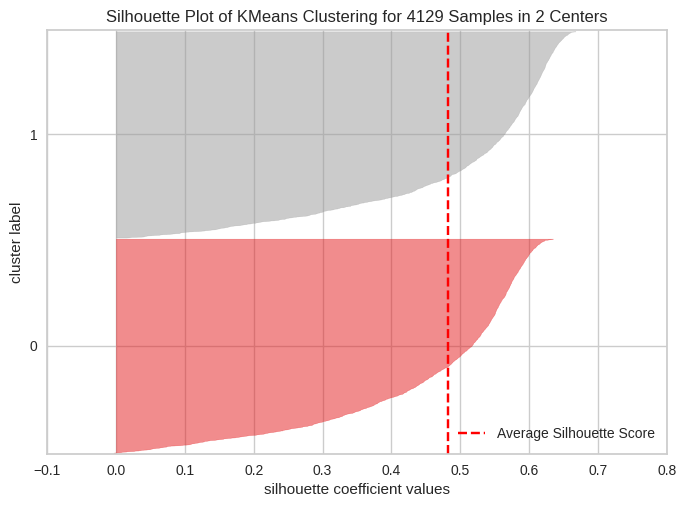

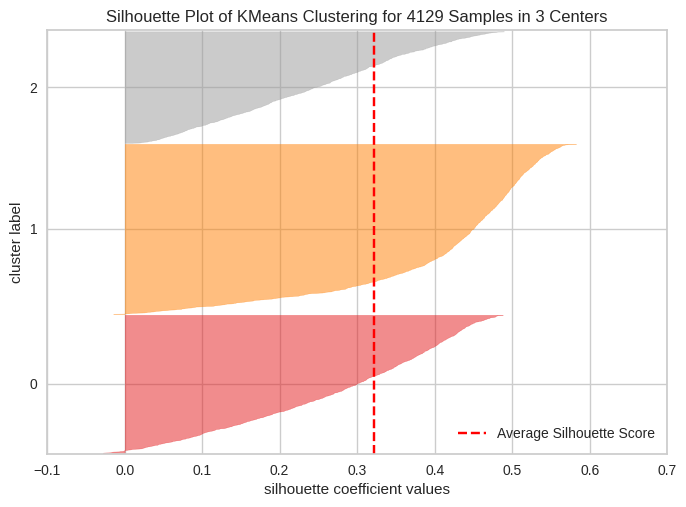

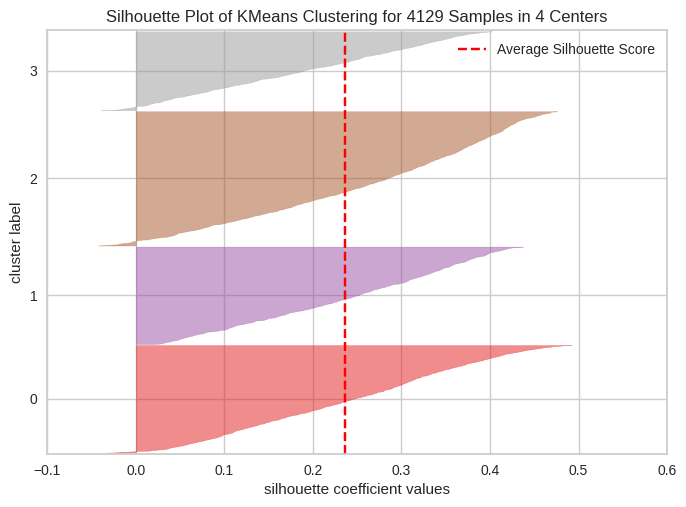

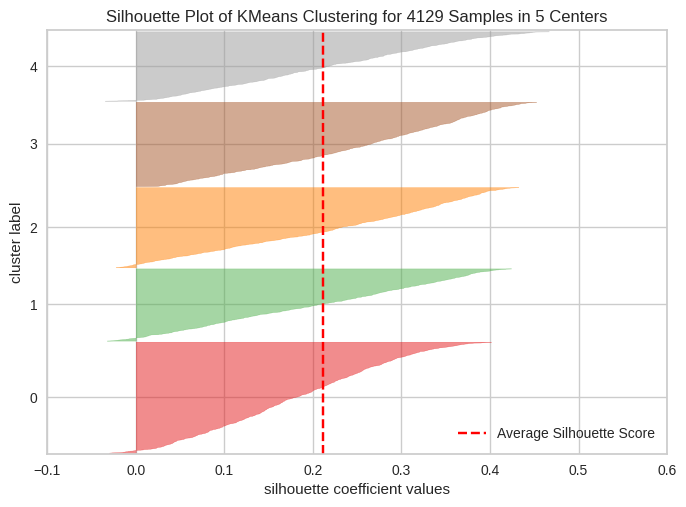

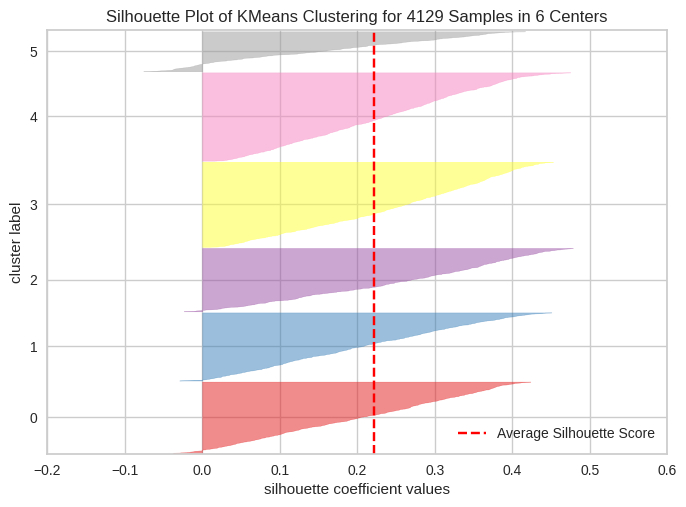

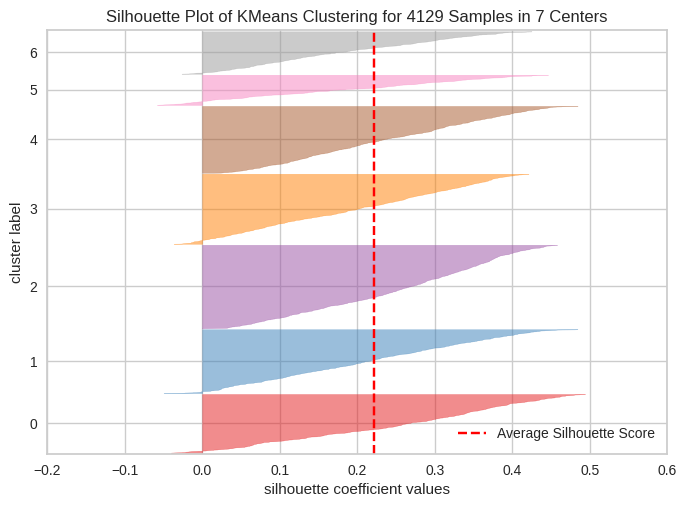

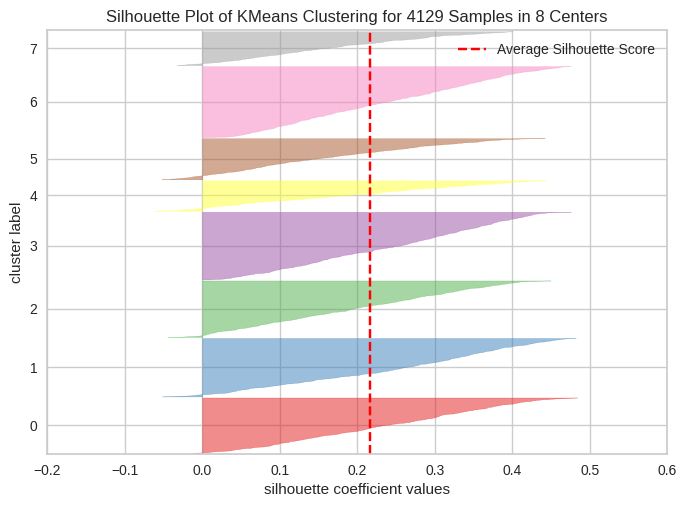

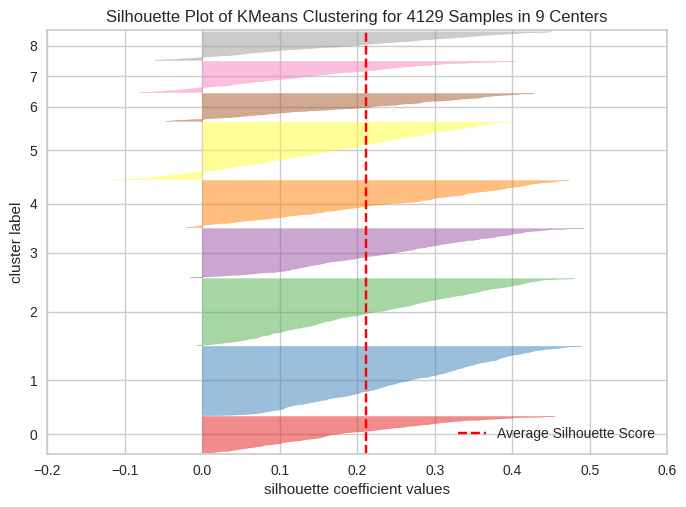

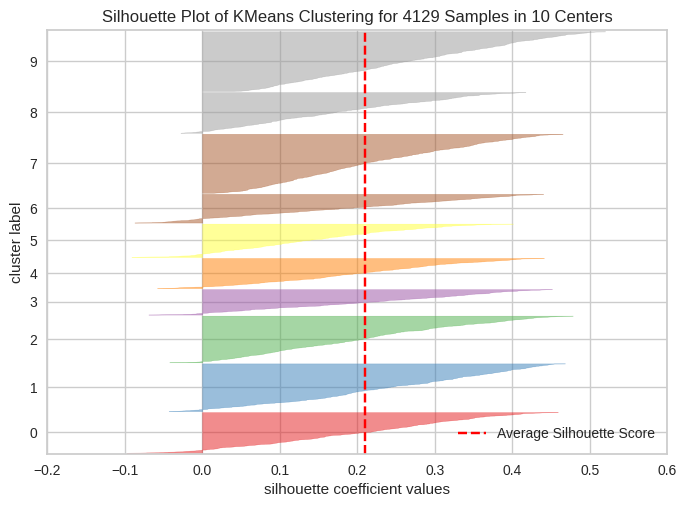

In [ ]:
k_range = range(2,11)

for i in k_range:
    km = KMeans(n_clusters=i, init="k-means++")
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(train_df)
    visualizer.poof()

In [ ]:
km_model = KMeans(n_clusters = 3)
km_model.fit(train_df)
pd.DataFrame(km_model.cluster_centers_, columns=train_df.columns)

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined
0,0.640013,0.973681,2.415985,1.399016,2.707310,2.728222
1,0.945749,1.001536,2.426864,1.599302,0.513156,0.548809
2,1.546410,1.189299,2.430785,1.278201,4.357803,4.373212


### 메타데이터로 Agglomerative 훈련


In [ ]:
from sklearn.cluster import AgglomerativeClustering

aggl = AgglomerativeClustering(n_clusters=4, linkage="ward", metric="euclidean").fit(train_df)
aggl

AgglomerativeClustering(n_clusters=4)

In [ ]:
aggl_labels = aggl.labels_

fig = make_subplots(rows=1, cols=2, subplot_titles=("K-Means cluster","Agglomerative cluster"))

fig.add_trace(
    go.Scatter(x=train_df["item_cnt"],
               y=train_df["years_from_joined"],
               mode="markers",
               marker=dict(color=km_model.labels_),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_df["item_cnt"],
               y=train_df["years_from_joined"],
               mode="markers",
               marker=dict(color=aggl_labels),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800, showlegend=False)
fig.show()

### 훈련된 모델에 test set을 사용해 예측

In [ ]:
test_vendor_metadata_label_df = test_df.copy()
test_cluster = km_model.fit_predict(test_df)

test_vendor_metadata_label_df["label_from_km"] = test_cluster

In [ ]:
test_cluster = aggl.fit_predict(test_df)
test_vendor_metadata_label_df["label_from_aggl"] = test_cluster

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("K-means cluster-test", "Agglomerative cluster-test"))

fig.add_trace(
    go.Scatter(x=test_vendor_metadata_label_df["item_cnt"],
               y=test_vendor_metadata_label_df["years_from_joined"],
               mode="markers",
               marker=dict(color=test_vendor_metadata_label_df["label_from_km"]),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=test_vendor_metadata_label_df["item_cnt"],
               y=test_vendor_metadata_label_df["years_from_joined"],
               mode="markers",
               marker=dict(color=test_vendor_metadata_label_df["label_from_aggl"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

## 판매자(공급) 컨설팅에 활용할 그룹으로 군집화 (거래데이터 활용)
  

### 변수간 상관관계

In [ ]:
vendor_stats_df.head(2)

,vendor_id,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,19sJIV53qJApk91,1.71,6.0,12,11,24200.000000,916.666667,0.104453,2.41,0.39,0.04
1,UChsuoA4cPkm4Uj,1.71,6.0,12,9,46916.666667,0.000000,0.095133,1.09,0.45,0.13


In [ ]:
corr_matrix = vendor_stats_df.select_dtypes(exclude='object').corr()
corr_matrix

,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
weekly_order_cnt,1.000000,0.992662,0.916604,0.910951,-0.034530,-0.100294,0.126901,0.099584,0.122862,0.254062
monthly_order_cnt,0.992662,1.000000,0.937016,0.930361,-0.034132,-0.087311,0.131289,0.101787,0.128190,0.264406
total_order_cnt,0.916604,0.937016,1.000000,0.979115,-0.002231,0.029267,0.117747,0.088232,0.128882,0.253386
total_user_cnt,0.910951,0.930361,0.979115,1.000000,-0.008073,0.013124,0.137139,0.099840,0.143133,0.288209
avg_cost,-0.034530,-0.034132,-0.002231,-0.008073,1.000000,0.347557,0.003964,0.012409,0.010270,-0.008317
avg_delivery_cost,-0.100294,-0.087311,0.029267,0.013124,0.347557,1.000000,-0.015499,0.004110,0.024460,-0.007112
roas_growth_rate,0.126901,0.131289,0.117747,0.137139,0.003964,-0.015499,1.000000,0.738310,0.020874,0.442410
review_score,0.099584,0.101787,0.088232,0.099840,0.012409,0.004110,0.738310,1.000000,0.133786,0.096454
review_rate,0.122862,0.128190,0.128882,0.143133,0.010270,0.024460,0.020874,0.133786,1.000000,0.593493
review_reply_rate,0.254062,0.264406,0.253386,0.288209,-0.008317,-0.007112,0.442410,0.096454,0.593493,1.000000


In [ ]:
corr_matrix[abs(corr_matrix)>=0.4]

# weekly_order_cnt	monthly_order_cnt	total_order_cnt	total_user_cnt는 상관관계가 높음
# avg_cost, avg_delivery_cost는 다른변수와의 상관관계가 높지 않음

# roas_growth_rate, review_score는 0.74
# review_rate, review_reply_rate는 0.6

,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
weekly_order_cnt,1.000000,0.992662,0.916604,0.910951,NaN,NaN,NaN,NaN,NaN,NaN
monthly_order_cnt,0.992662,1.000000,0.937016,0.930361,NaN,NaN,NaN,NaN,NaN,NaN
total_order_cnt,0.916604,0.937016,1.000000,0.979115,NaN,NaN,NaN,NaN,NaN,NaN
total_user_cnt,0.910951,0.930361,0.979115,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
avg_cost,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
avg_delivery_cost,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
roas_growth_rate,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,0.73831,NaN,0.442410
review_score,NaN,NaN,NaN,NaN,NaN,NaN,0.73831,1.00000,NaN,NaN
review_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.593493
review_reply_rate,NaN,NaN,NaN,NaN,NaN,NaN,0.44241,NaN,0.593493,1.000000


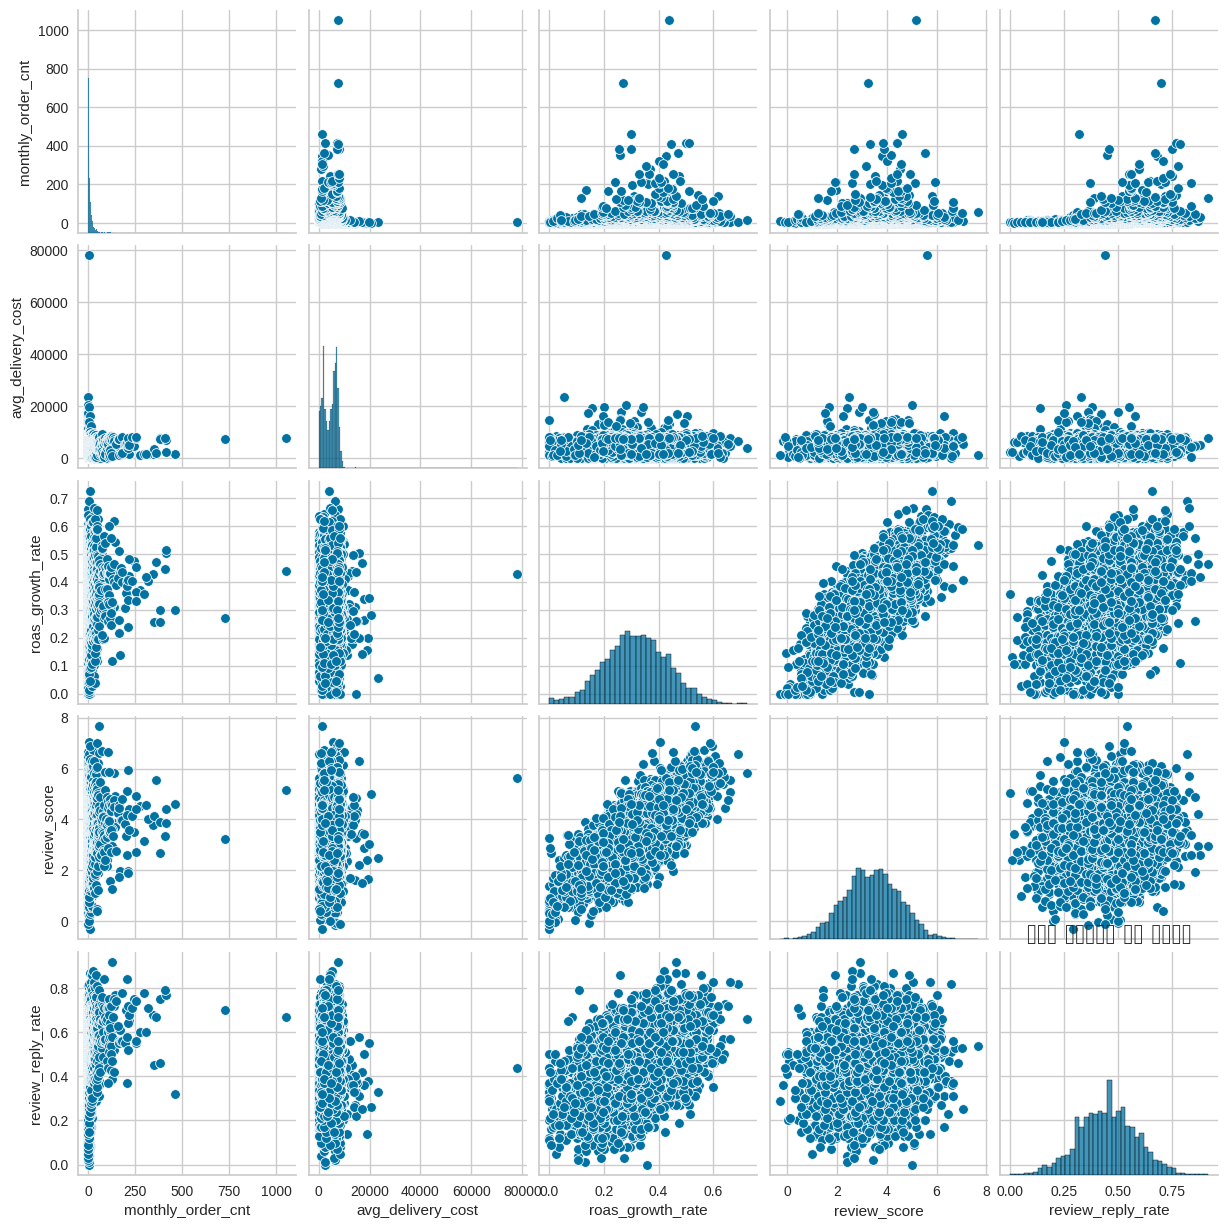

In [ ]:
sns.pairplot(vendor_stats_df[["monthly_order_cnt", "avg_delivery_cost", "roas_growth_rate", "review_score", "review_reply_rate"]])

plt.title("판매자 거래데이터 변수 상관관계", fontsize = 20)
plt.show()

### HDBSCAN 모델 설치 & 정규화 적용

In [ ]:
# !pip install hdbscan

In [ ]:
vendor_stats_df.columns

Index(['vendor_id', 'weekly_order_cnt', 'monthly_order_cnt', 'total_order_cnt',
       'total_user_cnt', 'avg_cost', 'avg_delivery_cost', 'roas_growth_rate',
       'review_score', 'review_rate', 'review_reply_rate'],
      dtype='object')

In [ ]:
vendor_numerics_df = vendor_stats_df[['monthly_order_cnt', 'avg_cost', 'avg_delivery_cost', 'roas_growth_rate',
       'review_score', 'review_rate', 'review_reply_rate']]

In [ ]:
mm_scaler = MinMaxScaler(feature_range=(0, 5))
scaled_vendor_stats = mm_scaler.fit_transform(vendor_numerics_df)

scaled_vendor_stats_df = pd.DataFrame(scaled_vendor_stats, columns=vendor_numerics_df.columns)
scaled_vendor_stats_df.head()

,monthly_order_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,0.023774,0.086391,0.058877,0.720692,1.706399,1.894737,0.217391
1,0.023774,0.195447,0.000000,0.656382,0.878294,2.210526,0.706522
2,0.002377,0.075229,0.473691,1.996456,2.509410,2.526316,1.195652
3,0.014264,0.074909,0.131135,1.223478,1.888331,2.368421,0.326087
4,0.006657,0.075830,0.112401,0.673268,0.897114,2.473684,1.413043


### 판매자(거래데이터) - 데이터셋 분리

In [ ]:
train_df, test_df = train_test_split(scaled_vendor_stats_df, test_size=0.1)
print(len(train_df), len(test_df))

4129 459


In [ ]:
hdb_data_df = train_df.copy()

### HDBSCAN 모델 파라미터 탐색

In [ ]:
import hdbscan

In [ ]:
def opt_hdbscan(train_x, ms_list, data_df, min_cluster_size=30, label_name="hdbscan_label", x_col="total_order_cnt" , y_col="avg_delivery_cost"):
  for ms in ms_list:
    hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=ms, prediction_data=True).fit_predict(train_x)
    data_df[label_name] = hdbscan_label
    data_df[label_name] = data_df[label_name].astype(str)

    # outlier 추세확인. (outlier=클러스터명이 -1인 경우)
    hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
    outliers = hdbscan_case_dict[-1]

    # 시각화
    fig = px.scatter(data_df, x=x_col, y=y_col, color=label_name)
    fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
    fig.show()

    # 군집별 데이터 분포 확인
    hdb_cluster_df = data_df.groupby(label_name).mean()
    hb_cluster_df["point_cnt"] = data_df[label_name].value_counts()
    print(hdb_cluster_df)
  return data_df

In [ ]:
ms_list = [1, 3, 5, 10]

hdb_data_df = opt_hdbscan(train_df, ms_list, hdb_data_df, min_cluster_size=5, label_name="hdbscan_label", x_col="monthly_order_cnt" , y_col="avg_delivery_cost")

               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.323457  0.275812           0.424871   
0                       1.075249  0.164406           0.308899   
1                       0.020797  0.135103           0.288172   
2                       0.014209  0.154048           0.238295   
3                       0.008440  0.128437           0.375945   
4                       0.049677  0.135611           0.295123   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.205257      2.424436     3.006748           2.575599   
0                      2.675926      3.058971     3.442105           3.195652   
1                      0.105014      0.395232     1.989474           1.500000   
2                      1.405684      1.867419     1.184211           0.561

               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.127251  0.180883           0.330293   
0                       0.157298  0.161070           0.312934   
1                       0.042989  0.130111           0.291934   
2                       0.102019  0.141184           0.251804   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.251453      2.340218     2.893898           2.526617   
0                      2.793200      3.066499     4.315789           3.880435   
1                      2.185123      2.319762     2.834278           2.421840   
2                      2.383916      2.109159     3.831579           3.923913   

               point_cnt  
hdbscan_label             
-1                   878  
0                      5  
1             

               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.082933  0.156120           0.308953   
0                       0.039084  0.093892           0.364587   
1                       0.038403  0.125252           0.290635   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.235410      2.343072     2.861074           2.487510   
0                      3.242349      2.721455     3.673684           3.750000   
1                      2.160882      2.304669     2.836315           2.402939   

               point_cnt  
hdbscan_label             
-1                  2106  
0                      5  
1                   2018  


               monthly_order_cnt  avg_cost  avg_delivery_cost  \
hdbscan_label                                                   
-1                      0.063061  0.141756           0.297873   
0                       0.037510  0.106552           0.289010   
1                       0.027287  0.127005           0.270579   
2                       0.025247  0.128701           0.347492   

               roas_growth_rate  review_score  review_rate  review_reply_rate  \
hdbscan_label                                                                   
-1                     2.197206      2.323736     2.849778           2.445916   
0                      1.883013      1.895926     3.180055           2.857551   
1                      2.403899      2.199916     2.982456           2.789855   
2                      2.283546      2.394286     2.814549           2.427441   

               point_cnt  
hdbscan_label             
-1                  3910  
0                     19  
1             

### 메타데이터와 거래데이터 합치기

In [ ]:
vendor_df = vendor_metadata_df.set_index("vendor_id").join(vendor_stats_df.set_index("vendor_id"), how="left").reset_index()

In [ ]:
vendor_df.head(2)

,vendor_id,if_affiliation,joined_date,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,19sJIV53qJApk91,0,2019-10-23,74,126,2000.0,0.22,1897,5.2,1.71,6.0,12,11,24200.000000,916.666667,0.104453,2.41,0.39,0.04
1,UChsuoA4cPkm4Uj,0,2019-10-27,1592,114,1600.0,0.25,1893,5.2,1.71,6.0,12,9,46916.666667,0.000000,0.095133,1.09,0.45,0.13


In [ ]:
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]

vendor_df = vendor_df.select_dtypes(include=numerics_types)

In [ ]:
vendor_numerics_cols = [col for col in vendor_df if np.isin(vendor_df[col].unique(), [0, 1]).all()]

vendor_df = vendor_df.drop(vendor_numerics_cols, axis=1)
vendor_df.head(2)

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,74,126,2000.0,0.22,1897,5.2,1.71,6.0,12,11,24200.000000,916.666667,0.104453,2.41,0.39,0.04
1,1592,114,1600.0,0.25,1893,5.2,1.71,6.0,12,9,46916.666667,0.000000,0.095133,1.09,0.45,0.13


### 판매자 - 변수간 상관관계

In [ ]:
corr_matrix = vendor_df.corr()
corr_matrix

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
bookmark_cnt,1.000000,0.008374,-0.003479,-0.038308,0.278736,0.279052,0.072095,0.077554,0.087223,0.084376,0.041657,0.111470,0.005495,0.020923,-0.005973,0.000093
item_cnt,0.008374,1.000000,0.231289,0.021084,0.102564,0.102630,0.008679,0.009463,0.020910,0.013952,0.026073,0.067542,-0.002205,-0.003903,0.002345,0.001733
base_shipping_fee,-0.003479,0.231289,1.000000,0.451113,0.000226,-0.000059,-0.012643,-0.011599,-0.016639,-0.012127,-0.011963,-0.007464,0.021662,-0.000108,-0.009305,0.026350
commission_rate,-0.038308,0.021084,0.451113,1.000000,-0.159884,-0.160162,0.012362,0.009663,-0.018601,-0.017540,-0.043063,-0.122915,0.004651,-0.002336,-0.013590,-0.006923
days_from_joined,0.278736,0.102564,0.000226,-0.159884,1.000000,0.999900,-0.016804,0.007704,0.147791,0.149763,0.191498,0.666056,0.039959,0.034414,0.063356,0.105253
years_from_joined,0.279052,0.102630,-0.000059,-0.160162,0.999900,1.000000,-0.016320,0.008143,0.148143,0.150114,0.191172,0.665816,0.039909,0.034311,0.063330,0.105583
weekly_order_cnt,0.072095,0.008679,-0.012643,0.012362,-0.016804,-0.016320,1.000000,0.992662,0.916604,0.910951,-0.034530,-0.100294,0.126901,0.099584,0.122862,0.254062
monthly_order_cnt,0.077554,0.009463,-0.011599,0.009663,0.007704,0.008143,0.992662,1.000000,0.937016,0.930361,-0.034132,-0.087311,0.131289,0.101787,0.128190,0.264406
total_order_cnt,0.087223,0.020910,-0.016639,-0.018601,0.147791,0.148143,0.916604,0.937016,1.000000,0.979115,-0.002231,0.029267,0.117747,0.088232,0.128882,0.253386
total_user_cnt,0.084376,0.013952,-0.012127,-0.017540,0.149763,0.150114,0.910951,0.930361,0.979115,1.000000,-0.008073,0.013124,0.137139,0.099840,0.143133,0.288209


In [ ]:
corr_matrix[abs(corr_matrix)>=0.4]

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
bookmark_cnt,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_cnt,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
base_shipping_fee,NaN,NaN,1.000000,0.451113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commission_rate,NaN,NaN,0.451113,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
days_from_joined,NaN,NaN,NaN,NaN,1.000000,0.999900,NaN,NaN,NaN,NaN,NaN,0.666056,NaN,NaN,NaN,NaN
years_from_joined,NaN,NaN,NaN,NaN,0.999900,1.000000,NaN,NaN,NaN,NaN,NaN,0.665816,NaN,NaN,NaN,NaN
weekly_order_cnt,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.992662,0.916604,0.910951,NaN,NaN,NaN,NaN,NaN,NaN
monthly_order_cnt,NaN,NaN,NaN,NaN,NaN,NaN,0.992662,1.000000,0.937016,0.930361,NaN,NaN,NaN,NaN,NaN,NaN
total_order_cnt,NaN,NaN,NaN,NaN,NaN,NaN,0.916604,0.937016,1.000000,0.979115,NaN,NaN,NaN,NaN,NaN,NaN
total_user_cnt,NaN,NaN,NaN,NaN,NaN,NaN,0.910951,0.930361,0.979115,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


### 판매자 정규화

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_vendor_trans = StandardScaler().fit_transform(vendor_df)

scaled_vendor_trans_df = pd.DataFrame(scaled_vendor_trans, columns=vendor_df.columns)
scaled_vendor_trans_df.head()

,bookmark_cnt,item_cnt,base_shipping_fee,commission_rate,days_from_joined,years_from_joined,weekly_order_cnt,monthly_order_cnt,total_order_cnt,total_user_cnt,avg_cost,avg_delivery_cost,roas_growth_rate,review_score,review_rate,review_reply_rate
0,-1.205485,0.508887,-0.189569,-0.048359,-1.298231,-1.295053,-0.292844,-0.239669,-0.253841,-0.302303,-0.367635,-1.284790,-1.875444,-0.885334,-1.495724,-3.075268
1,0.756105,0.337365,-0.999951,0.171898,-1.303858,-1.295053,-0.292844,-0.239669,-0.253841,-0.309184,0.364795,-1.600810,-1.957080,-2.076463,-1.001435,-2.401470
2,-1.177056,-1.149161,-0.999951,-1.369907,0.204319,0.191526,-0.364459,-0.371552,-0.253841,-0.309184,-0.442597,0.941715,-0.255949,0.269700,-0.507146,-1.727672
3,-0.875969,-1.006226,-0.392164,-0.855972,-1.073130,-1.090007,-0.195954,-0.298284,-0.253841,-0.309184,-0.444747,-0.896947,-1.237192,-0.623647,-0.754290,-2.925535
4,0.849145,-0.606007,-1.607737,-1.076230,-0.988717,-0.987485,-0.292844,-0.345176,-0.253841,-0.309184,-0.438567,-0.997499,-1.935645,-2.049392,-0.589527,-1.428206


### 문판매자 - PCA 차원 축소

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA()
pca.fit(scaled_vendor_trans_df)

PCA()

In [ ]:
fig = px.line(x=range(scaled_vendor_trans_df.shape[1]),
              y=pca.explained_variance_ratio_.cumsum(),
              labels={"x":"principal components", "y":"explained variance"})

fig.update_layout(width=800, height=500)
fig.show()

In [ ]:
pca = PCA(n_components=6)
vendor_pca_components = pca.fit_transform(scaled_vendor_trans_df)

vendor_pca_df = pd.DataFrame(data = vendor_pca_components)

In [ ]:
vendor_pca_df.head(5)

,0,1,2,3,4,5
0,-2.106170,-2.377411,-2.950284,-0.021343,-1.293266,0.624668
1,-1.907018,-1.997181,-3.389534,-0.441108,-0.356290,-0.211673
2,-1.056790,0.551102,-0.765592,-1.907592,-1.022754,0.584228
3,-1.776552,-1.867392,-2.239332,-1.224179,-1.088569,0.323064
4,-1.591616,-1.344284,-2.962317,-1.945125,0.399146,-0.857277


In [ ]:
vendor_pca_df.columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"]

vendor_pca_df.head(2)

,pc1,pc2,pc3,pc4,pc5,pc6
0,-2.106170,-2.377411,-2.950284,-0.021343,-1.293266,0.624668
1,-1.907018,-1.997181,-3.389534,-0.441108,-0.356290,-0.211673


### 판매자 - PCA를 통해 생성된 주성분 탐색

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z=pca.components_,
                   x=list(scaled_vendor_trans_df.columns),
                   y=list(vendor_pca_df.columns),
                   hoverongaps = False))
fig.update_layout(height=500, width=1000)
fig.show()

### 판매자 - train/test set 분리

In [ ]:
train_df, test_df = train_test_split(vendor_pca_df, test_size=0.1)
print(len(train_df), len(test_df))

4129 459


In [ ]:
km_data_df = train_df.copy()

### 판매자 - 차원 축소된 데이터로 최적의 k 찾기

In [ ]:
# !pip install kneed

In [ ]:
from kneed import KneeLocator

distortions = []
k_range = range(1,11)

for i in k_range:
    km = KMeans(n_clusters = i, random_state=810)
    km.fit(train_df)
    distortions.append(km.inertia_)

print(distortions)

kneedle = KneeLocator(x=k_range, y=distortions, S=1.0, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

[53361.488623782294, 44329.41794933271, 34648.70182305721, 30836.108615343346, 28744.515160635812, 26823.2946331679, 24817.325725171555, 22242.877531977538, 21171.179766901223, 20157.804043421587]
최적의 k : 4
최적의 k의 y값 : 30836.109


### 판매자 - 최적의 k로 K-Means 훈련

In [ ]:
km = KMeans(n_clusters = 4)
km.fit(train_df)
pd.DataFrame(km.cluster_centers_, columns=train_df.columns)

,pc1,pc2,pc3,pc4,pc5,pc6
0,-0.519734,1.451004,-0.812182,0.097197,-0.098172,0.020843
1,16.897190,-1.818748,-3.456087,0.072793,-1.005955,0.606712
2,-0.520315,-1.653714,-0.044315,-0.061816,-0.080374,0.028074
3,0.976486,0.859945,1.169372,-0.073200,0.274461,-0.080718


In [ ]:
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[np.int32(0), 1316],
 [np.int32(1), 33],
 [np.int32(2), 1706],
 [np.int32(3), 1074]]

In [ ]:
km_data_df["label_from_km"] = km.labels_

In [ ]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means PCA cluster"))

fig.add_trace(
    go.Scatter(x=km_data_df["pc1"],
               y=km_data_df["pc2"],
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=km_data_df["pc1"],
               y=km_data_df["pc2"],
               mode="markers",
               marker=dict(color=km_data_df["label_from_km"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=km_data_df["pc1"],
                                   y=km_data_df["pc2"],
                                   z=km_data_df["pc3"],
                                   mode='markers',
                                   marker=dict(
                                        size=5,
                                        color=km_data_df["label_from_km"],
                                        opacity=0.8
                                    )
                                   )])
fig.show()

### 판매자 - 훈련된 모델에 test set을 사용해 예측

In [ ]:
test_vendor_label_df = test_df.copy()
test_cluster = km_model.fit_predict(test_df)

test_vendor_label_df["label_from_km"] = test_cluster

In [ ]:
fig = go.Figure(data=[go.Scatter3d(x=test_vendor_label_df["pc1"],
                                   y=test_vendor_label_df["pc2"],
                                   z=test_vendor_label_df["pc3"],
                                   mode='markers',
                                   marker=dict(
                                        size=5,
                                        color=test_vendor_label_df["label_from_km"],
                                        opacity=0.8
                                    )
                                   )])
fig.show()

## 마무리
- 메타데이터와 거래데이터를 구별하지 않고 clustering에 활용 가능하다
- Clustering 과정에서 PCA를 통해 차원을 축소할 수 있음 (해석은 어려워질 수 있음)
- 훈련된 clustering 결과는 다양한 방법으로 활용 가능 (추천시스템 등)